# Load Data

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
# Load the datasets
df = pd.read_csv('enriched_data.csv')

# Remove all movies with less than 100 vote count 

In [31]:
# Remove movies with vote_count less than 100
filtered_df = df[df['vote_count'] >= 100].copy()

# Check the new shape of the dataset
print(f"Original dataset size: {df.shape[0]}")
print(f"Filtered dataset size: {filtered_df.shape[0]}")

Original dataset size: 2180
Filtered dataset size: 1792


# Check Statistics of column vote average

In [32]:
# Check basic statistics
print("Basic Statistics for 'vote_average':")
print(filtered_df['vote_average'].describe())

# Check unique values and their frequencies
print("\nValue Counts for 'vote_average':")
print(filtered_df['vote_average'].value_counts())

Basic Statistics for 'vote_average':
count    1792.000000
mean        6.227511
std         0.805673
min         3.000000
25%         5.700000
50%         6.300000
75%         6.800000
max         8.500000
Name: vote_average, dtype: float64

Value Counts for 'vote_average':
6.5    103
6.0     99
6.2     91
6.3     89
6.6     83
6.1     82
6.7     81
5.9     74
5.8     74
7.0     72
6.4     70
6.8     66
5.7     65
5.5     61
5.6     60
7.3     59
5.4     55
7.2     54
6.9     53
5.3     44
7.1     42
7.4     35
5.2     32
5.0     28
5.1     26
7.5     23
4.7     19
7.6     18
7.7     18
4.9     17
4.4     13
4.8     12
4.6     10
4.5      9
7.8      9
7.9      8
4.2      5
8.0      4
8.1      4
4.1      3
8.2      3
4.3      2
8.3      2
4.0      2
3.0      2
3.2      2
3.7      2
3.5      2
3.9      1
3.8      1
8.5      1
3.6      1
3.1      1
Name: vote_average, dtype: int64


# Check the distribution of the vote average column 

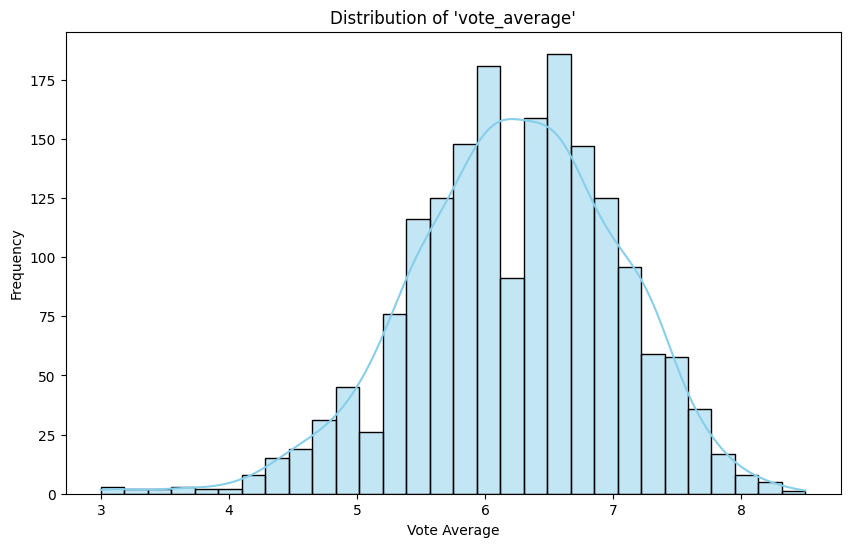

In [33]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['vote_average'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of 'vote_average'")
plt.xlabel("Vote Average")
plt.ylabel("Frequency")
plt.show()

# Movies with vote less than 6 will be consider bad movies
# Movies with vote from 6 to 6.5 will be consider average movies
# Movies with vote higher than 6.5 will be consider good movies


Value Counts for 'movie_category':
Bad        623
Average    617
Good       552
Name: movie_category, dtype: int64


C:\Users\billy\AppData\Local\Temp\ipykernel_23924\506554831.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x='movie_category', order=["Bad", "Average", "Good"], palette='viridis')


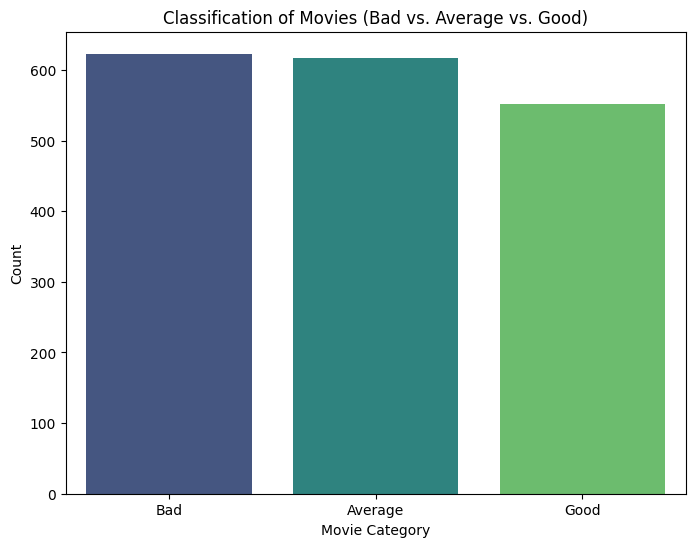

In [34]:
# Define thresholds for movie categories
def classify_movie(vote):
    if vote < 6:
        return "Bad"
    elif 6 <= vote <= 6.6:
        return "Average"
    else:
        return "Good"

# Apply the classification function
filtered_df['movie_category'] = filtered_df['vote_average'].apply(classify_movie)

# Check the distribution of movie categories
print("\nValue Counts for 'movie_category':")
print(filtered_df['movie_category'].value_counts())

# Visualize the distribution of movie categories
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_df, x='movie_category', order=["Bad", "Average", "Good"], palette='viridis')
plt.title("Classification of Movies (Bad vs. Average vs. Good)")
plt.xlabel("Movie Category")
plt.ylabel("Count")
plt.show()

# Encode the movie rating

In [35]:
# Map the movie_category column to numerical values
rating_mapping = {'Bad': 0, 'Average': 1, 'Good': 2}
filtered_df['movie_rating_encode'] = filtered_df['movie_category'].map(rating_mapping)

# Verify the new column
print(filtered_df[['movie_category', 'movie_rating_encode']].head())

# Check the distribution of the new column
print("\nValue Counts for 'movie_rating_encode':")
print(filtered_df['movie_rating_encode'].value_counts())

  movie_category  movie_rating_encode
0        Average                    1
1            Bad                    0
2        Average                    1
3            Bad                    0
4            Bad                    0

Value Counts for 'movie_rating_encode':
0    623
1    617
2    552
Name: movie_rating_encode, dtype: int64


# Convert sentiment label
## *Positve = 1 and Negative = 0

In [36]:
filtered_df['sentiment_numeric'] = (filtered_df['sentiment_label'] == 'POSITIVE').astype(int)

# Multinomial Logistics Regression
## *Run the model on numerical data
## *Split the data 8:2

In [37]:
# Define features and target
features = [
    'runtime', 'popularity', 'genre_science_fiction', 'genre_adventure', 'genre_mystery',
    'genre_action', 'genre_horror', 'genre_fantasy', 'genre_music', 'genre_war', 'genre_comedy',
    'genre_foreign', 'genre_thriller', 'genre_animation', 'genre_crime', 'genre_tv_movie',
    'genre_documentary', 'genre_western', 'genre_family', 'genre_history', 'genre_romance',
    'genre_drama', 'keyword_woman director', 'keyword_independent film', 'keyword_duringcreditsstinger',
    'keyword_based on novel', 'keyword_murder', 'keyword_aftercreditsstinger', 'keyword_violence',
    'keyword_dystopia', 'keyword_sport', 'keyword_revenge', 'adjusted_budget',
    'number_of_cast', 'dominant_topic', 'high_value_actors', 'high_value_directors', 'sentiment_numeric'
]
X = filtered_df[features]
y = filtered_df['movie_rating_encode']

# Handle missing values (if any)
#X = X.fillna(0)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.80      0.72       108
           1       0.58      0.50      0.53       121
           2       0.78      0.74      0.76       130

    accuracy                           0.67       359
   macro avg       0.67      0.68      0.67       359
weighted avg       0.67      0.67      0.67       359

Accuracy: 0.6740947075208914
Confusion Matrix:
 [[86 17  5]
 [39 60 22]
 [ 7 27 96]]


# Random Forest Classifier

In [38]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print results
print("Random Forest - Classification Report:\n", report_rf)
print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - Confusion Matrix:\n", conf_matrix_rf)

Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.70      0.66       108
           1       0.56      0.47      0.51       121
           2       0.74      0.75      0.75       130

    accuracy                           0.64       359
   macro avg       0.64      0.64      0.64       359
weighted avg       0.64      0.64      0.64       359

Random Forest - Accuracy: 0.6434540389972145
Random Forest - Confusion Matrix:
 [[76 23  9]
 [38 57 26]
 [10 22 98]]


# Gradient Boosting Classifier

In [39]:
# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Print results
print("Gradient Boosting - Classification Report:\n", report_gb)
print("Gradient Boosting - Accuracy:", accuracy_gb)
print("Gradient Boosting - Confusion Matrix:\n", conf_matrix_gb)

Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.69      0.64       108
           1       0.52      0.55      0.53       121
           2       0.79      0.65      0.71       130

    accuracy                           0.63       359
   macro avg       0.64      0.63      0.63       359
weighted avg       0.64      0.63      0.63       359

Gradient Boosting - Accuracy: 0.6267409470752089
Gradient Boosting - Confusion Matrix:
 [[74 25  9]
 [40 67 14]
 [ 8 38 84]]


# SVM

In [40]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42) 
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Print results
print("SVM - Classification Report:\n", report_svm)
print("SVM - Accuracy:", accuracy_svm)
print("SVM - Confusion Matrix:\n", conf_matrix_svm)

SVM - Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.81      0.72       108
           1       0.55      0.45      0.50       121
           2       0.75      0.72      0.74       130

    accuracy                           0.66       359
   macro avg       0.65      0.66      0.65       359
weighted avg       0.65      0.66      0.65       359

SVM - Accuracy: 0.6573816155988857
SVM - Confusion Matrix:
 [[87 15  6]
 [41 55 25]
 [ 6 30 94]]


In [41]:
# Define a function to get the classification report and confusion matrix as a dictionary
def get_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    return report, accuracy, conf_matrix
# Initialize a list to hold the model results
model_results = []

# Logistic Regression
logreg_report, logreg_accuracy, logreg_conf_matrix = get_metrics(y_test, y_pred)
logreg_results = {
    'Model': 'Logistic Regression',
    'Accuracy': logreg_accuracy,
    'Precision (Macro)': logreg_report['macro avg']['precision'],
    'Recall (Macro)': logreg_report['macro avg']['recall'],
    'F1-Score (Macro)': logreg_report['macro avg']['f1-score'],
    'Confusion Matrix': logreg_conf_matrix
}
model_results.append(logreg_results)

# Random Forest
rf_report, rf_accuracy, rf_conf_matrix = get_metrics(y_test, y_pred_rf)
rf_results = {
    'Model': 'Random Forest',
    'Accuracy': rf_accuracy,
    'Precision (Macro)': rf_report['macro avg']['precision'],
    'Recall (Macro)': rf_report['macro avg']['recall'],
    'F1-Score (Macro)': rf_report['macro avg']['f1-score'],
    'Confusion Matrix': rf_conf_matrix
}
model_results.append(rf_results)

# Gradient Boosting
gb_report, gb_accuracy, gb_conf_matrix = get_metrics(y_test, y_pred_gb)
gb_results = {
    'Model': 'Gradient Boosting',
    'Accuracy': gb_accuracy,
    'Precision (Macro)': gb_report['macro avg']['precision'],
    'Recall (Macro)': gb_report['macro avg']['recall'],
    'F1-Score (Macro)': gb_report['macro avg']['f1-score'],
    'Confusion Matrix': gb_conf_matrix
}
model_results.append(gb_results)

# SVM
svm_report, svm_accuracy, svm_conf_matrix = get_metrics(y_test, y_pred_svm)
svm_results = {
    'Model': 'SVM',
    'Accuracy': svm_accuracy,
    'Precision (Macro)': svm_report['macro avg']['precision'],
    'Recall (Macro)': svm_report['macro avg']['recall'],
    'F1-Score (Macro)': svm_report['macro avg']['f1-score'],
    'Confusion Matrix': svm_conf_matrix
}
model_results.append(svm_results)

# Convert the results to a DataFrame
df_results = pd.DataFrame(model_results)

# Print the results
print(df_results.to_string(index=False))

              Model  Accuracy  Precision (Macro)  Recall (Macro)  F1-Score (Macro)                          Confusion Matrix
Logistic Regression  0.674095           0.669642        0.676875          0.669631  [[86, 17, 5], [39, 60, 22], [7, 27, 96]]
      Random Forest  0.643454           0.636190        0.642875          0.637210 [[76, 23, 9], [38, 57, 26], [10, 22, 98]]
  Gradient Boosting  0.626741           0.635663        0.628353          0.628735  [[74, 25, 9], [40, 67, 14], [8, 38, 84]]
                SVM  0.657382           0.650418        0.661059          0.651334  [[87, 15, 6], [41, 55, 25], [6, 30, 94]]


# Success Prediction (rating classify) 
## *The best model was Multinomial Logistics Regression so we use that model to predict the rating

In [42]:
# Make predictions on both train and test sets
predicted_train_rating = model.predict(X_train_scaled) 
predicted_test_rating = model.predict(X_test_scaled)    

# Add predictions back to the original DataFrame
# Initialize column with NaN
filtered_df['predicted_movie_rating'] = np.nan  
filtered_df.loc[X_train.index, 'predicted_movie_rating'] = predicted_train_rating 
filtered_df.loc[X_test.index, 'predicted_movie_rating'] = predicted_test_rating  

# Verify the DataFrame
print(filtered_df[['movie_category', 'movie_rating_encode', 'predicted_movie_rating']].head())

  movie_category  movie_rating_encode  predicted_movie_rating
0        Average                    1                     0.0
1            Bad                    0                     0.0
2        Average                    1                     0.0
3            Bad                    0                     0.0
4            Bad                    0                     2.0


# Predict the result again without NLP features

In [43]:
# Make predictions on both train and test sets
predicted_train_rating = model.predict(X_train_scaled)  
predicted_test_rating = model.predict(X_test_scaled)    

# Add predictions back to the original DataFrame
# Initialize column with NaN
filtered_df['predicted_movie_rating_withoutNLP'] = np.nan  
filtered_df.loc[X_train.index, 'predicted_movie_rating_withoutNLP'] = predicted_train_rating 
filtered_df.loc[X_test.index, 'predicted_movie_rating_withoutNLP'] = predicted_test_rating    

# Verify the DataFrame
print(filtered_df[['movie_category', 'movie_rating_encode', 'predicted_movie_rating_withoutNLP']].head())

  movie_category  movie_rating_encode  predicted_movie_rating_withoutNLP
0        Average                    1                                0.0
1            Bad                    0                                0.0
2        Average                    1                                0.0
3            Bad                    0                                0.0
4            Bad                    0                                2.0


# Convert the encode column back to Bad -  Average - Good

In [44]:
# Map predicted_movie_rating to movie_category
filtered_df['predicted_movie_category'] = filtered_df['predicted_movie_rating'].map({0: 'Bad', 1: 'Average', 2: 'Good'})

# Verify the final DataFrame with the new column
print(filtered_df[['predicted_movie_rating', 'predicted_movie_category']].head())

   predicted_movie_rating predicted_movie_category
0                     0.0                      Bad
1                     0.0                      Bad
2                     0.0                      Bad
3                     0.0                      Bad
4                     2.0                     Good


In [45]:
# Map predicted_movie_rating to movie_category
filtered_df['predicted_movie_category_withoutNLP'] = filtered_df['predicted_movie_rating_withoutNLP'].map({0: 'Bad', 1: 'Average', 2: 'Good'})

# Verify the final DataFrame with the new column
print(filtered_df[['predicted_movie_rating_withoutNLP', 'predicted_movie_category_withoutNLP']].head())

   predicted_movie_rating_withoutNLP predicted_movie_category_withoutNLP
0                                0.0                                 Bad
1                                0.0                                 Bad
2                                0.0                                 Bad
3                                0.0                                 Bad
4                                2.0                                Good


# Check important variables that influenced the model

Top 10 Important Features:
                     Feature  Coefficient  Abs_Coefficient
1                 popularity    -0.769426         0.769426
0                    runtime    -0.655222         0.655222
32           adjusted_budget     0.654218         0.654218
21               genre_drama    -0.317597         0.317597
13           genre_animation    -0.255475         0.255475
6               genre_horror     0.226636         0.226636
5               genre_action     0.200775         0.200775
10              genre_comedy     0.162267         0.162267
23  keyword_independent film    -0.142303         0.142303
29          keyword_dystopia    -0.142141         0.142141


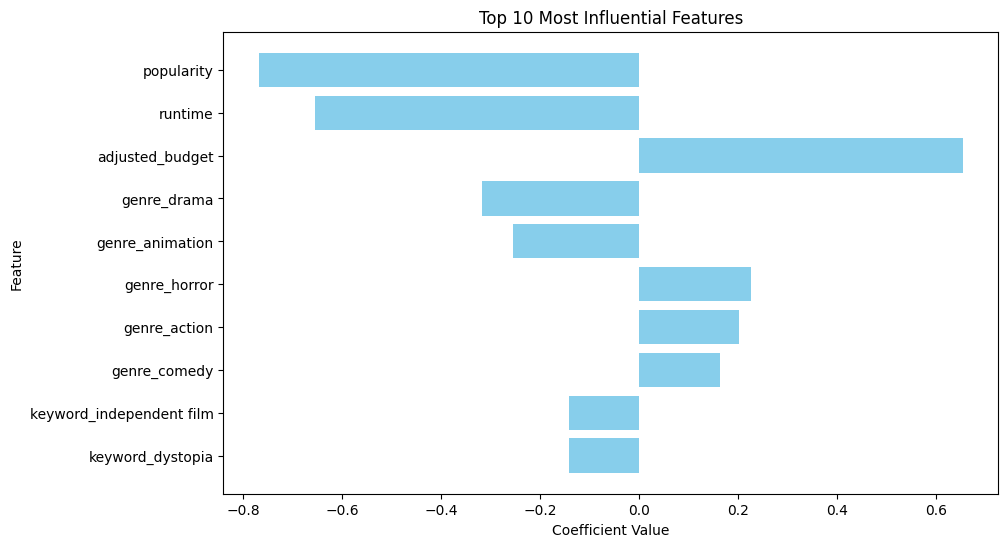

In [46]:
# Extract feature importance (coefficients)
coefficients = model.coef_

# Create a DataFrame to organize the coefficients
importance_df = pd.DataFrame({
    'Feature': features, 
    'Coefficient': coefficients[0]  
})

# Sort by the absolute value of coefficients to find the most influential variables
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top 10 most important features
print("Top 10 Important Features:")
print(importance_df.head(10))

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Coefficient'][:10][::-1], color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Top 10 Most Influential Features")
plt.show()

# Find out what are some variables that driven the prediction of each class

In [47]:
# Example: Show coefficients for each class
for i, class_label in enumerate(model.classes_):
    print(f"Class {class_label} Coefficients:")
    print(pd.DataFrame({
        'Feature': features,
        'Coefficient': model.coef_[i]
    }).sort_values(by='Coefficient', ascending=False).head(10))

Class 0 Coefficients:
                         Feature  Coefficient
32               adjusted_budget     0.654218
6                   genre_horror     0.226636
5                   genre_action     0.200775
10                  genre_comedy     0.162267
12                genre_thriller     0.118260
24  keyword_duringcreditsstinger     0.090807
2          genre_science_fiction     0.089026
37             sentiment_numeric     0.073555
28              keyword_violence     0.062202
31               keyword_revenge     0.037855
Class 1 Coefficients:
                         Feature  Coefficient
14                   genre_crime     0.098422
8                    genre_music     0.082171
1                     popularity     0.081951
6                   genre_horror     0.077270
10                  genre_comedy     0.071967
4                  genre_mystery     0.061361
29              keyword_dystopia     0.059043
24  keyword_duringcreditsstinger     0.037452
32               adjusted_budget    

# Extract the data

In [48]:
filtered_df.to_csv('success_classification.csv', index=False)